# 1.2.2. Bài tập thực hành 1

### Giới thiệu về tập dữ liệu

Tập dữ liệu này liên quan đến các biến thể rượu vang đỏ và trắng của rượu vang "Vinho Verde" Bồ Đào Nha. Để biết thêm chi tiết, vui lòng tham khảo tài liệu tham khảo [Cortez và cộng sự, 2009]. Do các vấn đề về quyền riêng tư và hậu cần, chỉ có các biến lý hóa (đầu vào) và cảm quan (đầu ra) được cung cấp (ví dụ: không có dữ liệu về loại nho, nhãn hiệu rượu vang, giá bán rượu vang, v.v.).

* **fixed acidity (độ axit cố định / không bay hơi)**: Phần lớn các axit trong rượu là axit “cố định” (khó bay hơi). Tổng độ axit của mẫu có thể tách thành hai nhóm: axit cố định và axit bay hơi. “Axit cố định” gồm các axit hữu cơ có độ bay hơi thấp như malic, lactic, tartaric, citric… và là đặc trưng vốn có của mẫu.

* **volatile acidity (độ axit bay hơi)**: Lượng axit axetic và các axit hữu cơ mạch ngắn có thể chưng cất ra khỏi mẫu (formic, acetic, propionic, butyric). Mức quá cao tạo vị giấm khó chịu.

* **citric acid (axit citric)**: Có lượng nhỏ nhưng tạo cảm giác “tươi” và vị cho rượu. Là axit hữu cơ yếu, không màu, tự nhiên có trong trái cây họ cam chanh; là chất trung gian trong chu trình axit citric của sinh vật hiếu khí.

* **residual sugar (đường dư)**: Lượng đường còn lại sau khi lên men kết thúc (hiếm khi < 1 g/L). Đo bằng g/L và quyết định độ ngọt; ở EU, mức đường dư gắn với các thuật ngữ ghi nhãn cụ thể.

* **chlorides (clorua / lượng muối)**: Hàm lượng ion clorua trong rượu. Rượu đỏ có thể trích ly clorua nhiều hơn do ion từ vỏ nho trong quá trình lên men. Khuyến nghị dịch nho đỏ không vượt ~356 mg/L clorua để rượu thành phẩm không vượt mức pháp lý tối đa ~606 mg/L (356×1,7 ≈ 606).

* **free sulfur dioxide (SO₂ tự do)**: Phần SO₂ ở dạng tự do cân bằng giữa SO₂ phân tử (khí hoà tan) và ion bisulfite. SO₂ tự do còn “rảnh” để phản ứng nên có tính sát khuẩn và chống oxy hóa. Tổng SO₂ = SO₂ tự do + SO₂ liên kết (đã phản ứng, thuận nghịch hoặc không thuận nghịch, với các phân tử khác trong rượu).

* **total sulfur dioxide (tổng SO₂)**: Tổng của SO₂ tự do và SO₂ liên kết. Ở nồng độ thấp, SO₂ hầu như khó nhận biết; về bản chất đây là SO₂ tự do cộng phần đã gắn với các chất khác (aldehyde, sắc tố, đường…).

* **density (khối lượng riêng / tỉ trọng)**: Phụ thuộc vào nồng độ cồn và đường; thường gần với nước. Đo bằng **hydrometer** (tỷ trọng kế) để so với nước tinh khiết, cho ra **tỷ trọng riêng – specific gravity (SG)**.

* **pH**: Mức độ axit/kiềm của rượu trên thang 0 (rất axit) đến 14 (rất kiềm); đa số rượu ở khoảng 3–4. pH cao (> 3,65) dễ gặp vấn đề vi sinh trong ủ/lưu trữ, nên thường bổ sung SO₂ (ví dụ dạng K₂S₂O₅) để ổn định.

* **sulphates (sunphat)**: Phụ gia có thể góp phần tạo ra khí SO₂ (tác dụng kháng khuẩn). Sulfite sinh tự nhiên ở mức thấp trong mọi rượu, đồng thời còn được bổ sung để bảo quản, chống vi khuẩn/nấm men. Một số người nhạy cảm với lưu huỳnh có thể bị đau đầu/nghẹt mũi.

* **alcohol (độ cồn)**: Phần trăm nồng độ cồn của rượu.

* **quality (chất lượng)**: Biến đầu ra; điểm đánh giá cảm quan (thang 3 đến 8).


### Thêm các thư viện cần thiết

In [38]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [39]:

url = "https://raw.githubusercontent.com/Phtzone/SGU25_KPDL_Group/main/Lab03/1.2/winequality-red/winequality-red.csv"
df = pd.read_csv(url)
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [40]:
df.shape

(1599, 12)

# EDA

In [41]:
sns.set_theme(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (8, 5)


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [44]:
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame(name='missing_values'))
print(f'Số dòng trùng lặp: {df.duplicated(keep=False).sum()}')
dups = df[df.duplicated(keep=False)].copy()
display(dups)

,missing_values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Số dòng trùng lặp: 460


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


Xoá dòng trùng lặp

In [45]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Kiểm tra lại dataset sau khi xoá

In [46]:
df.shape

(1599, 12)

Trực quan hóa dữ liệu với thư viện Matplotlib

Text(0, 0.5, 'Số mẫu')

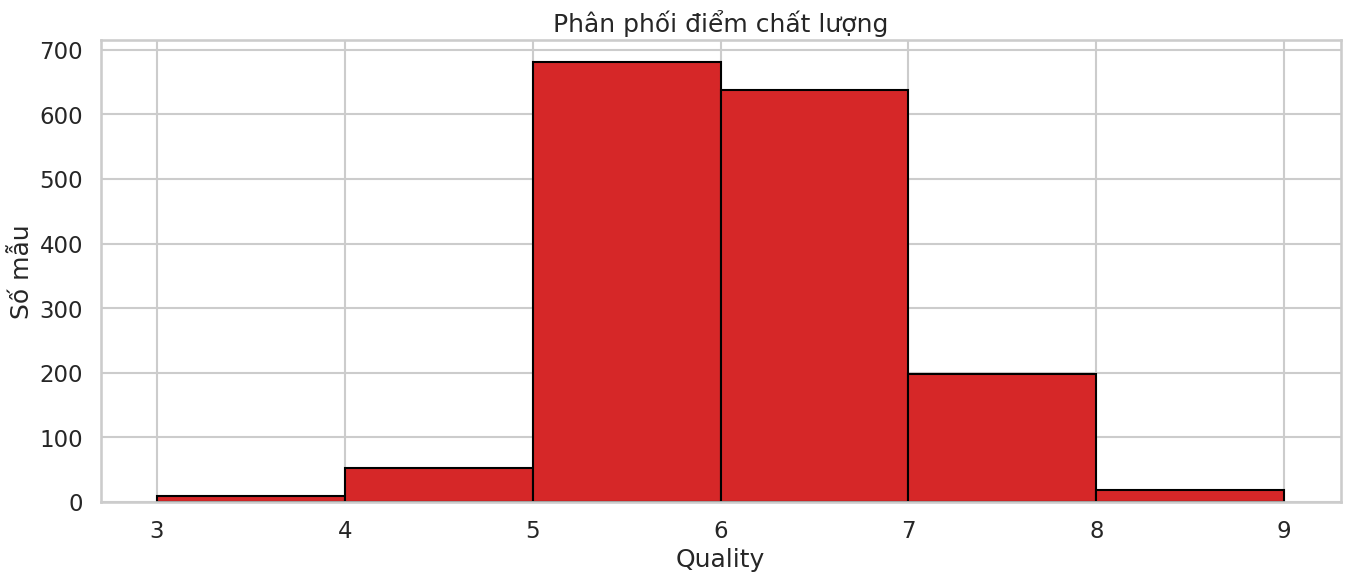

In [47]:
# Histogram chất lượng và các đặc trưng chính
plt.figure(figsize=(16, 6))
plt.hist(df["quality"], bins=range(3, 10), color="tab:red", edgecolor="black")
plt.title("Phân phối điểm chất lượng")
plt.xlabel("Quality")
plt.ylabel("Số mẫu")

+ Biểu đồ bên trái cho thấy điểm chất lượng của rượu vang đỏ chủ yếu nằm quanh mức trung bình 5–7, với 6 là mức phổ biến nhất. Rất ít mẫu đạt điểm thấp 3–4 hoặc cao 8–9, nên tập dữ liệu nghiêng mạnh về các mức chất lượng trung bình.

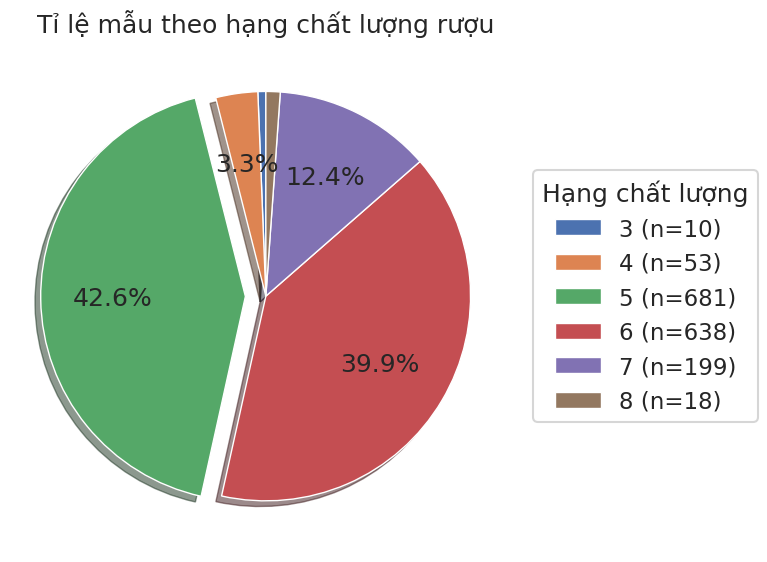

In [48]:
quality_counts = df["quality"].value_counts().sort_index()
explode = [0.1 if count == quality_counts.max() else 0 for count in quality_counts]

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    quality_counts.values,
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 2 else "",
    startangle=90,
    explode=explode,
    shadow=True,
    labels=None,  # tránh lặp nhãn ngoài
    pctdistance=0.65,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
)

ax.legend(
    wedges,
    [f"{quality} (n={count})" for quality, count in zip(quality_counts.index, quality_counts.values)],
    title="Hạng chất lượng",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

ax.set_title("Tỉ lệ mẫu theo hạng chất lượng rượu")
fig.tight_layout()
plt.show()


+ Hai nhóm chất lượng trung bình 5 và 6 chiếm gần hết mẫu: lần lượt 42.6% (681 mẫu) và 39.9% (638 mẫu), cho thấy rượu trong tập dữ liệu chủ yếu ở mức trung bình.
+ Chất lượng 7 (khá) chỉ chiếm 12.4% với 199 mẫu; hơi nổi bật hơn so với phần còn lại nhưng vẫn ít hơn nhiều so với hạng trung bình.
+ Các hạng thấp 3 và 4 rất hiếm (10 và 53 mẫu), cho thấy rượu kém chất lượng gần như không xuất hiện; hạng cao 8 chỉ có 18 mẫu, nghĩa là rượu hảo hạng cũng rất hạn chế.
+ Miếng màu xanh (hạng 5) được tách ra một chút để nhấn mạnh là nhóm đông nhất; legend đi kèm nêu rõ số lượng từng hạng nên dễ đối chiếu với tỷ lệ phần trăm hiển thị trong biểu đồ.

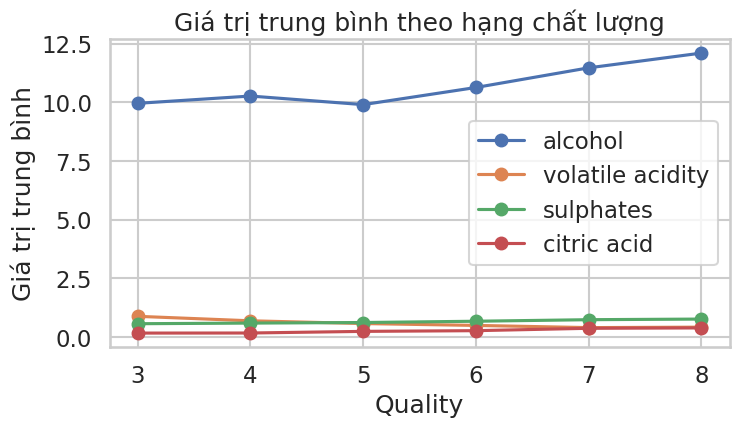

In [49]:
# Trung bình mỗi đặc trưng theo quality
mean_by_quality = df.groupby("quality")[["alcohol", "volatile acidity", "sulphates", "citric acid"]].mean()
mean_by_quality.plot(kind="line", marker="o", figsize=(8, 4))
plt.title("Giá trị trung bình theo hạng chất lượng")
plt.xlabel("Quality")
plt.ylabel("Giá trị trung bình")
plt.grid(True)
plt.show()


+ Đường màu xanh (alcohol) tăng rõ từ chất lượng 3 lên 8 → rượu có độ cồn trung bình cao hơn thường được chấm điểm chất lượng cao hơn.
+ Đường màu cam (volatile acidity) có xu hướng giảm dần khi chất lượng tăng → rượu càng ngon thì độ chua/acid bay hơi càng thấp.
+ Đường màu xanh lá (sulphates) tăng nhẹ theo chất lượng → mức sulphates cao hơn đi kèm chất lượng tốt hơn, có thể nhờ khả năng bảo quản và ổn định hương vị.
+ Đường màu đỏ (citric acid) cũng nhích lên nhưng chậm → citric acid chỉ đóng vai trò hỗ trợ nhỏ; ảnh hưởng lên chất lượng không mạnh bằng hai yếu tố trên.

Tổng thể, biểu đồ cho thấy các loại rượu được đánh giá cao thường có độ cồn và sulphates cao hơn, đồng thời volatile acidity thấp hơn.